In [1]:
import pandas as pd

In [120]:
df = pd.read_csv('ipo_scoop.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], skiprows=2, names=['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price', 'first_day_close', 'first_day_pctchg', 'dollar_change_open', 'dollar_change_close', 'star_rating', 'performed'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 294.6+ KB


In [122]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,$4.00,$4.40,$6.18,54.50%,$0.40,$2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,$4.00,$5.51,$5.56,39.00%,$1.51,$1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,$4.00,$5.20,$4.62,15.50%,$1.20,$0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,$5.00,$5.00,$4.38,-12.40%,$0.00,-$0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,$5.00,$5.55,$4.88,-2.40%,$0.55,-$0.12,1,NaN


In [123]:
df = df.applymap(lambda x: x if not '$' in str(x) else x.replace('$', ''))

In [124]:
df = df.applymap(lambda x: x if not '%' in str(x) else x.replace('%', ''))

In [125]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1,NaN


In [126]:
df.date = pd.to_datetime(df.date)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

In [434]:
df[df['date'] == '11/120']

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct,is_bulge,lead_mgr
1258,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.0,17.0,18.4,15.0,1.0,2.4,1.0,NaN,1.4,8.235294,0,1,5.882353,8.235294,1,"Goldman, Sachs"


In [435]:
df.loc[1258, 'date'] = '2012-11-20'

In [436]:
df['date'] = pd.to_datetime(df['date'])

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 20 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
price_up               3142 non-null int64
is_goldman             3142 non-null int64
gap_open_pct           3123 non-null float64
open_to_close_pct      3123 non-null float64
is_bulge               3142 non-null int64
lead_mgr               3142 non-null objec

In [438]:
df['offer_price'] = df['offer_price'].astype('float')

In [439]:
df['open_price'] = df['open_price'].astype('float')
df['first_day_close'] = df['first_day_close'].astype('float')

In [440]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'price_up', 'is_goldman', 'gap_open_pct',
       'open_to_close_pct', 'is_bulge', 'lead_mgr'],
      dtype='object')

In [441]:
df.replace('N/C', 0, inplace=True)

In [442]:
for col in df.columns[4:11]:
    df[col] = df[col].astype('float')

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 20 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
price_up               3142 non-null int64
is_goldman             3142 non-null int64
gap_open_pct           3123 non-null float64
open_to_close_pct      3123 non-null float64
is_bulge               3142 non-null int64
lead_mgr               3142 non-null objec

### Opening Day Change

In [444]:
df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

date
2000.0    35.562278
2001.0    12.761489
2002.0     7.247043
2003.0    11.945000
2004.0    10.703276
2005.0     9.910752
2006.0     9.988270
2007.0    11.521406
2008.0     2.318085
2009.0     7.175738
2010.0     8.654875
2011.0     9.044406
2012.0    11.981918
2013.0    16.352652
2014.0    12.363160
2015.0    13.947341
2016.0    10.979623
2017.0    10.537348
2018.0    14.417569
Name: first_day_pctchg, dtype: float64

In [445]:
mean_year_first = df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

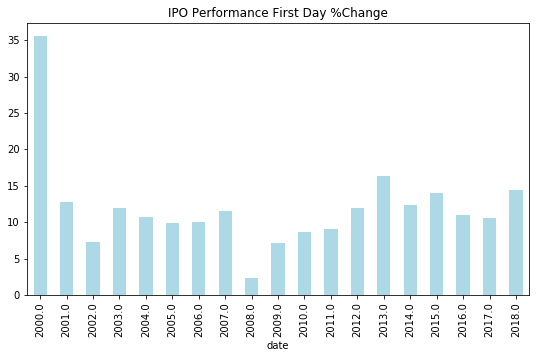

In [446]:
%matplotlib inline
mean_year_first.plot(kind = 'bar', color = 'lightblue', figsize = (9, 5), title = 'IPO Performance First Day %Change')

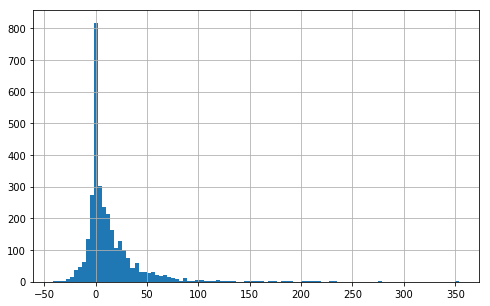

In [447]:
df.first_day_pctchg.hist(bins = 100, figsize = (8, 5))

In [448]:
df['dollar_chg_opencls'] = df['dollar_change_close'] - df['dollar_change_open']

In [449]:
df['pct_chg_opencls'] = (df['dollar_chg_opencls']/df['open_price']) * 100

In [450]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct,is_bulge,lead_mgr
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0,0,9.090909,40.454545,0,ViewTrade Securities
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,0,0,27.404719,0.907441,0,ViewTrade Securities
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1,0,23.076923,-11.153846,0,ViewTrade Securities
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,1,0,0.000000,-12.400000,0,Piper Jaffray
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,1,0,9.909910,-12.072072,0,Roth Capital Partners


In [451]:
df.pct_chg_opencls.describe()

count    3123.000000
mean        1.379582
std        10.885217
min       -49.281222
25%        -2.860242
50%         0.000000
75%         4.000000
max       159.417476
Name: pct_chg_opencls, dtype: float64

In [452]:
df[df.pct_chg_opencls < -98]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct,is_bulge,lead_mgr


In [453]:
df.loc[2218, 'dollar_change_open'] = 0.09

In [454]:
df.iloc[2218]

date                      2005-04-18 00:00:00
issuer                 Terra Nova Acquisition
symbol                                  TNVAU
managers                    EarlyBird Capital
offer_price                                 6
open_price                               6.09
first_day_close                          6.22
first_day_pctchg                         3.67
dollar_change_open                       0.09
dollar_change_close                      0.22
star_rating                                 1
performed                                 NaN
dollar_chg_opencls                       0.13
pct_chg_opencls                       2.13465
price_up                                    0
is_goldman                                  0
gap_open_pct                          1.47783
open_to_close_pct                     2.13465
is_bulge                                    0
lead_mgr                    EarlyBird Capital
Name: 2218, dtype: object

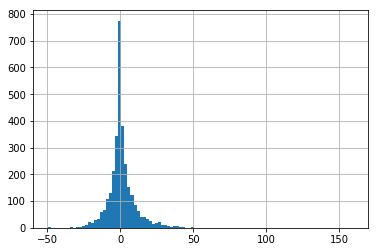

In [455]:
df.pct_chg_opencls.hist(bins= 100)

In [456]:
df[df.date >= '2018']['dollar_chg_opencls'].describe()

count    144.000000
mean       0.355833
std        2.476673
min       -6.260000
25%       -0.652500
50%        0.000000
75%        0.567500
max       14.750000
Name: dollar_chg_opencls, dtype: float64

In [457]:
df[df.date >= '2018']['dollar_chg_opencls'].sum()

51.24000000000001

### Feature Engineering



In [458]:
sp = pd.read_csv('SPY.csv')

In [459]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700


In [460]:
sp.sort_values('Date', inplace = True)
sp.reset_index(drop= True, inplace = True)

In [461]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700


In [462]:
sp['day_ago'] = sp.Date.shift(periods=1)
sp['week_ago'] = sp.Date.shift(periods = 7)

In [463]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN


In [464]:
sp['day_ago_close'] = sp.Close.shift(periods = 1)

In [465]:
sp['week_ago_close'] = sp.Close.shift(periods = 7)

In [466]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN


In [90]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
Date              24 non-null object
Open              24 non-null float64
High              24 non-null float64
Low               24 non-null float64
Close             24 non-null float64
Adj Close         24 non-null float64
Volume            24 non-null int64
day_ago           23 non-null object
week_ago          17 non-null object
day_ago_close     23 non-null float64
week_ago_close    17 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ KB


In [91]:
sp['chg'] = ((sp.day_ago_close - sp.week_ago_close)/sp.week_ago_close) * 100

In [92]:
sp.chg.describe()

count    17.000000
mean      0.436672
std       0.882171
min      -1.330621
25%      -0.259985
50%       0.403274
75%       1.144198
max       2.011064
Name: chg, dtype: float64

In [93]:
sp.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close,chg
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN,NaN
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600,2018-07-20,NaN,279.679993,NaN,NaN
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900,2018-07-23,NaN,280.200012,NaN,NaN
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900,2018-07-24,2018-07-16,281.609985,279.339996,0.812626
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500,2018-07-25,2018-07-17,284.010010,280.470001,1.262170
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700,2018-07-26,2018-07-18,283.339996,281.059998,0.811214


In [94]:
df['sp_close_open_chg_pct'] = sp.chg

In [95]:
df['sp_close_open_chg_pct'].describe()

count    17.000000
mean      0.436672
std       0.882171
min      -1.330621
25%      -0.259985
50%       0.403274
75%       1.144198
max       2.011064
Name: sp_close_open_chg_pct, dtype: float64

In [96]:
df.head(10)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545,NaN
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441,NaN
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-6.00,-0.36,-0.30,1.0,NaN,0.06,1.293103,NaN
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,2.00,0.55,0.10,1.0,NaN,-0.45,-8.108108,NaN
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-19.00,-1.00,-0.95,1.0,NaN,0.05,1.250000,0.812626
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,4.95,0.50,0.26,0.0,NaN,-0.24,-4.173913,1.262170
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603,0.811214


In [97]:
df.managers[:10]

0              ViewTrade Securities
1              ViewTrade Securities
2              ViewTrade Securities
3        Piper Jaffray/ Oppenheimer
4             Roth Capital Partners
5    Network 1 Financial Securities
6    Network 1 Financial Securities
7               Joseph Gunnar & Co.
8                Benchmark/ Cuttone
9                      Maxim Group 
Name: managers, dtype: object

In [433]:
df['lead_mgr'] = df['managers'].astype('str').map(lambda x:x.split('/')[0])

In [51]:
df['lead_mgr'].head()

0     ViewTrade Securities
1     ViewTrade Securities
2     ViewTrade Securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [52]:
df.loc[df['lead_mgr'].str.contains('ViewTrade'), 'lead_mgr'] = 'viewtrade securities'

In [53]:
df['lead_mgr'].head()

0     viewtrade securities
1     viewtrade securities
2     viewtrade securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [54]:
df.lead_mgr.unique()[:5]

array(['viewtrade securities', 'Piper Jaffray', 'Roth Capital Partners',
       'Network 1 Financial Securities', 'Joseph Gunnar & Co.'],
      dtype=object)

In [55]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'sp_close_open_chg_pct', 'lead_mgr'],
      dtype='object')

In [269]:
df['gap_open_pct'] = (df['dollar_change_open'].astype('float')/df['open_price'].astype('float'))*100

In [270]:
df['open_to_close_pct'] = ((df['dollar_change_close'].astype('float') - df['dollar_change_open'].astype('float'))/df['open_price'].astype('float')) * 100

In [271]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0,0,9.090909,40.454545
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,0,0,27.404719,0.907441
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1,0,23.076923,-11.153846
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,1,0,0.000000,-12.400000
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,1,0,9.909910,-12.072072


In [272]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'price_up', 'is_goldman', 'gap_open_pct',
       'open_to_close_pct'],
      dtype='object')

In [273]:
df['month'] = df.date.dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [274]:
df.month[:5]

AttributeError: 'DataFrame' object has no attribute 'month'

In [275]:
df['day'] = df.date.dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

In [276]:
df['day'][:5]

KeyError: 'day'

In [277]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0,0,9.090909,40.454545
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,0,0,27.404719,0.907441
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1,0,23.076923,-11.153846
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,1,0,0.000000,-12.400000
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,1,0,9.909910,-12.072072


In [278]:
df['day'] = df.day.map({1: 'mon', 2: 'tues', 3: 'weds', 4:'thurs', 5:'fri'   })

AttributeError: 'DataFrame' object has no attribute 'day'

In [279]:
df['month'] = df.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

AttributeError: 'DataFrame' object has no attribute 'month'

In [280]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0,0,9.090909,40.454545
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,0,0,27.404719,0.907441
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1,0,23.076923,-11.153846
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,1,0,0.000000,-12.400000
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,1,0,9.909910,-12.072072


### Feature Selection

In [281]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'price_up', 'is_goldman', 'gap_open_pct',
       'open_to_close_pct'],
      dtype='object')

In [282]:
X = pd.get_dummies(df[['month', 'day', 'gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price', 'dollar_chg_opencls']], drop_first = True)

KeyError: "['month' 'day'] not in index"

In [283]:
X.head(10)

,is_goldman,star_rating
0,0,0.0
1,0,1.0
2,0,0.0
3,0,1.0
4,0,1.0
5,0,1.0
6,0,1.0
7,0,1.0
8,0,0.0
9,0,0.0


In [284]:
X.shape

(3123, 2)

In [285]:
X = X[7:]

In [286]:
X.shape

(3116, 2)

In [287]:
X.head()

,is_goldman,star_rating
7,0,1.0
8,0,0.0
9,0,0.0
10,1,1.0
11,1,1.0


In [288]:
X.isnull().sum()

is_goldman     0
star_rating    0
dtype: int64

In [289]:
X.dropna().shape

(3116, 2)

In [290]:
X = X.dropna()

In [291]:
X.columns

Index(['is_goldman', 'star_rating'], dtype='object')

### Binary Classification

In [292]:
y = X.dollar_chg_opencls
X = X.drop('dollar_chg_opencls', axis = 1)

X_train, X_test = X[:2800], X[2800:]

AttributeError: 'DataFrame' object has no attribute 'dollar_chg_opencls'

In [293]:
X_test.shape

(781, 2)

In [294]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 3107 to 332
Data columns (total 2 columns):
is_goldman     781 non-null int64
star_rating    781 non-null float64
dtypes: float64(1), int64(1)
memory usage: 18.3 KB


In [295]:
y[:10]

0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    1
9    1
Name: price_up, dtype: int64

In [296]:
y = y.map(lambda x: 1 if x > 1 else 0)

In [297]:
y_train = y[:2800]
y_test = y[2800:]

In [298]:
y_test.shape

(323,)

In [299]:
y_train[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: price_up, dtype: int64

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2342, 2800]

In [302]:
clf.score(X_test, y_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [303]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0,0,9.090909,40.454545
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,0,0,27.404719,0.907441
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1,0,23.076923,-11.153846
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,1,0,0.000000,-12.400000
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,1,0,9.909910,-12.072072


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 20 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
price_up               3142 non-null int64
is_goldman             3142 non-null int64
gap_open_pct           3123 non-null float64
open_to_close_pct      3123 non-null float64
is_bulge               3142 non-null int64
lead_mgr               3142 non-null objec

In [355]:
df.price_up.value_counts()

0    1780
1    1362
Name: price_up, dtype: int64

str

In [305]:
df[np.isnan(df['is_goldman'])]a

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct


In [473]:
df.groupby('lead_mgr').mean().sort_values(by='price_up')

,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct,is_bulge
lead_mgr,,,,,,,,,,,,,,
Morgan Stanley,15.000000,14.120000,14.150000,-5.670000,-0.880000,-0.850,1.000000,0.030000,0.212465,0.0,1.0,-6.232295,0.212465,0.0
GunnAllen Financial,5.750000,5.875000,6.320000,8.145000,0.125000,0.570,1.000000,0.445000,6.137931,0.0,0.0,1.724138,6.137931,0.0
HCFB,8.000000,8.020000,8.060000,0.750000,0.020000,0.060,1.000000,0.040000,0.498753,0.0,0.0,0.249377,0.498753,0.0
I-Baners,8.000000,8.000000,8.000000,0.000000,0.000000,0.000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
ING Barings,18.750000,23.000000,23.800000,27.395000,4.250000,5.050,2.000000,0.800000,3.446970,0.0,0.0,18.181818,3.446970,0.0
J.P. Morgan,11.000000,12.170000,12.500000,13.640000,1.170000,1.500,2.000000,0.330000,2.711586,0.0,1.0,9.613804,2.711586,1.0
J.P. Morgan Securities Merrill Lynch,16.000000,14.500000,16.000000,0.000000,-1.500000,0.000,3.000000,1.500000,10.344828,0.0,1.0,-10.344828,10.344828,0.0
J.P. Morghan,12.500000,12.300000,12.530000,0.240000,-0.200000,0.030,1.000000,0.230000,1.869919,0.0,1.0,-1.626016,1.869919,0.0
Jefferies & Company,14.000000,14.500000,15.900000,13.570000,0.500000,1.900,2.000000,1.400000,9.655172,0.0,0.0,3.448276,9.655172,0.0


In [427]:
import numpy as np

df.columns
df['price_up'] = df.open_price > df.first_day_close # add in column to see if up or down for the day
df['price_up'] = df.price_up.astype('int')
df['is_bulge'] = df.managers.str.contains("Citi.*|Goldman.*").astype('bool').astype('int')
df['year'] = df.date.
my_df = df.dropna(thresh=5)

print(my_df[my_df['is_bulge']==1].price_up.value_counts()[1]/
      (my_df[my_df['is_bulge']==1].price_up.value_counts()[0] + 
       my_df[my_df['is_bulge']==1].price_up.value_counts()[1]))

print((my_df[my_df['is_bulge']==1].price_up.value_counts()[0] + 
       my_df[my_df['is_bulge']==1].price_up.value_counts()[1]))

#print(df.is_goldman.value_counts())a

0.4523305084745763
944


In [428]:
X = my_df[['is_bulge', 'offer_price']]
y = my_df.price_up
X_train, X_test,y_train,y_test  = train_test_split(X, y)

In [429]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

In [430]:
clf = LogisticRegressionCV()


In [431]:
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
print(pred)


0.559539052496799
             precision    recall  f1-score   support

          0       1.00      0.56      0.72       778
          1       0.00      0.33      0.01         3

avg / total       0.99      0.56      0.71       781

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [426]:
dumm = DummyClassifier()
dumm.fit(X_train, y_train)

print(dumm.score(X_train, y_train))
pred = dumm.predict(X_test)
print(classification_report(pred, y_test))

0.5034158838599487
             precision    recall  f1-score   support

          0       0.58      0.59      0.58       447
          1       0.44      0.43      0.43       334

avg / total       0.52      0.52      0.52       781



In [333]:
my_df.corr()

,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,dollar_chg_opencls,pct_chg_opencls,price_up,is_goldman,gap_open_pct,open_to_close_pct
offer_price,1.000000,0.885830,0.844464,0.203522,0.380967,0.339161,0.441496,0.058947,0.015189,0.030022,0.310461,0.251969,0.011321
open_price,0.885830,1.000000,0.970784,0.545694,0.766490,0.691082,0.575971,0.137567,0.047547,0.021247,0.291606,0.589403,0.044725
first_day_close,0.844464,0.970784,1.000000,0.656688,0.765531,0.789686,0.567928,0.369578,0.240435,-0.092826,0.282582,0.586341,0.240372
first_day_pctchg,0.203522,0.545694,0.656688,1.000000,0.805651,0.919538,0.489747,0.594796,0.521187,-0.260777,0.111527,0.808587,0.527142
dollar_change_open,0.380967,0.766490,0.765531,0.805651,1.000000,0.907607,0.536588,0.192525,0.073720,0.000782,0.151334,0.825691,0.073450
dollar_change_close,0.339161,0.691082,0.789686,0.919538,0.907607,1.000000,0.491385,0.586224,0.412153,-0.197626,0.140570,0.740488,0.416559
star_rating,0.441496,0.575971,0.567928,0.489747,0.536588,0.491385,1.000000,0.114081,0.079914,0.011195,0.214744,0.584110,0.078351
dollar_chg_opencls,0.058947,0.137567,0.369578,0.594796,0.192525,0.586224,0.114081,1.000000,0.827895,-0.462163,0.037316,0.138272,0.830964
pct_chg_opencls,0.015189,0.047547,0.240435,0.521187,0.073720,0.412153,0.079914,0.827895,1.000000,-0.551052,0.017810,0.044127,0.986579
price_up,0.030022,0.021247,-0.092826,-0.260777,0.000782,-0.197626,0.011195,-0.462163,-0.551052,1.000000,-0.006787,0.004066,-0.561037
